<a href="https://colab.research.google.com/github/SurajGusain0007/Dataset_Analysis_with_Suraj/blob/main/Student_Performance_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Reading Dataset

In [151]:
data=pd.read_csv("StudentsPerformance.csv")
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


#Rename column

In [152]:
data=data.rename(columns={'race/ethnicity':'race','parental level of education':'HigherEdu'})
data

,gender,race,HigherEdu,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


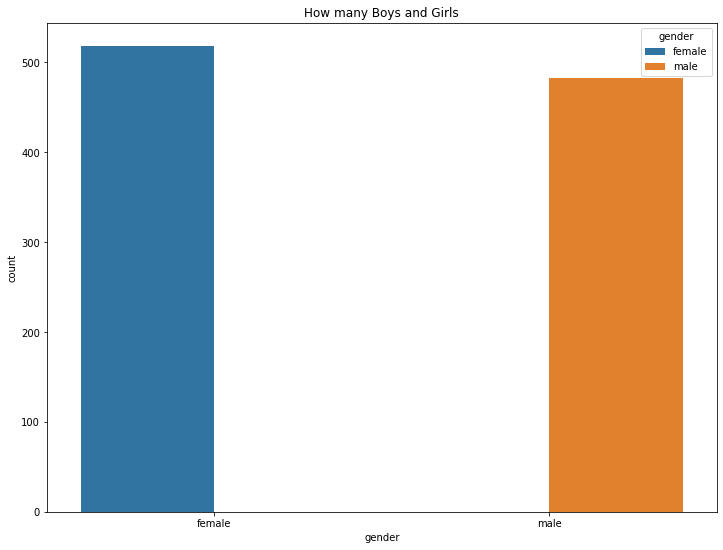

In [153]:
plt.figure(figsize=(12,9))
sns.countplot(x='gender',data=data,hue='gender')
plt.title("How many Boys and Girls")
plt.show()

In [154]:
#Group by
df=data.groupby(['gender','race']).size().reset_index().rename(columns={0:'total'})
df


,gender,race,total
0,female,group A,36
1,female,group B,104
2,female,group C,180
3,female,group D,129
4,female,group E,69
5,male,group A,53
6,male,group B,86
7,male,group C,139
8,male,group D,133
9,male,group E,71


 **Observation: Group C female category has the highest number of ethincity and Group A female catwgory has the lowest number of ethincity**

In [155]:
#Group  by
data.groupby('HigherEdu').size()

HigherEdu
associate's degree    222
bachelor's degree     118
high school           196
master's degree        59
some college          226
some high school      179
dtype: int64

In [156]:
eduqualification=data['HigherEdu'].value_counts().index
eduqualification

Index(['some college', 'associate's degree', 'high school', 'some high school',
       'bachelor's degree', 'master's degree'],
      dtype='object')

In [157]:
edu=data['HigherEdu'].value_counts().values
edu

array([226, 222, 196, 179, 118,  59])

##Display the visulization using pie chart

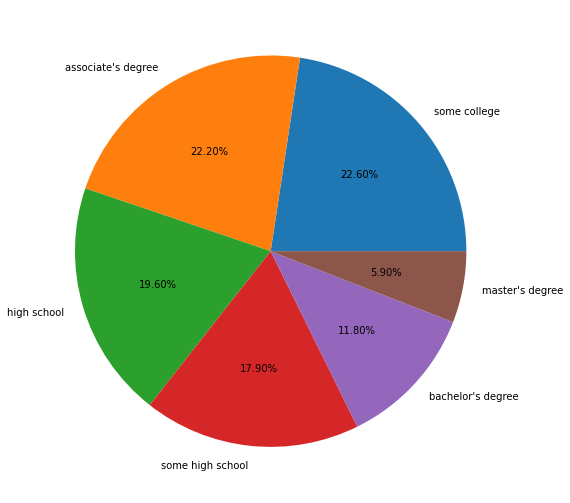

In [158]:
#Display the visulization using pie chart
plt.figure(figsize=(12,9))
plt.pie(edu,labels=eduqualification,autopct="%1.2f%%")
plt.show()

In [159]:
data=data.rename(columns={'test preparation course':'preparation'})
data

,gender,race,HigherEdu,lunch,preparation,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


**Observation:Some college has the highest educaton and master degree has the lowest highest qualification**

# Display the visulization using countplot

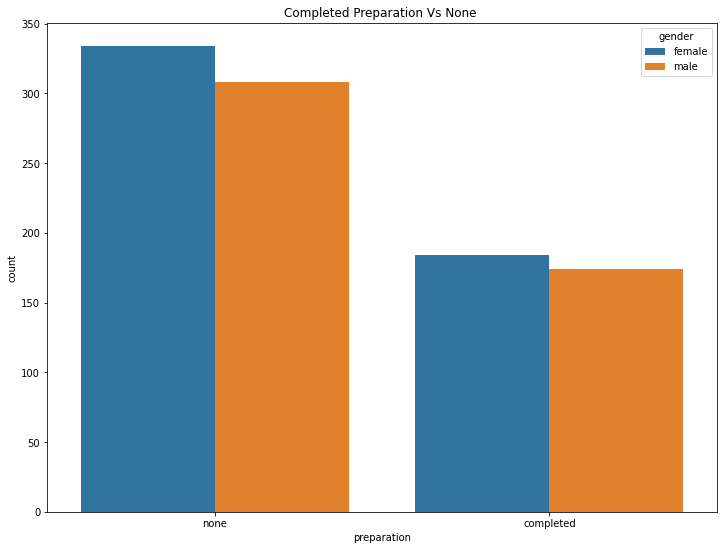

In [160]:
plt.figure(figsize=(12,9))
sns.countplot(x='preparation',data=data,hue='gender')
plt.title("Completed Preparation Vs None ")
plt.show()

In [161]:
#Checking null values
data.isnull().sum()

gender           0
race             0
HigherEdu        0
lunch            0
preparation      0
math score       0
reading score    0
writing score    0
dtype: int64

In [162]:
#Checking duplicate value of math score column
data['math score'].duplicated().any()

True

In [163]:
df1=data.groupby(['math score','gender']).size().reset_index().rename(columns={0:'Total count'}).tail(10)
df1

,math score,gender,Total count
137,96,female,2
138,96,male,1
139,97,female,2
140,97,male,4
141,98,female,1
142,98,male,2
143,99,female,2
144,99,male,1
145,100,female,3
146,100,male,4


In [164]:
df=data.groupby(['reading score','gender']).size().reset_index().rename(columns={0:'Total count'}).tail(10)
df

,reading score,gender,Total count
122,93,male,1
123,94,female,3
124,95,female,8
125,96,female,1
126,96,male,3
127,97,female,4
128,97,male,1
129,99,female,3
130,100,female,14
131,100,male,3


In [165]:
df=data.groupby(['writing score','gender']).size().reset_index().rename(columns={0:'Total count'}).tail(10)
df

,writing score,gender,Total count
126,94,female,6
127,95,female,7
128,95,male,1
129,96,female,4
130,97,female,2
131,98,female,2
132,99,female,3
133,99,male,1
134,100,female,13
135,100,male,1


In [166]:
#Groupby
students=data.groupby(['gender','lunch']).size().reset_index().rename(columns={0:'total count'})
students

,gender,lunch,total count
0,female,free/reduced,189
1,female,standard,329
2,male,free/reduced,166
3,male,standard,316


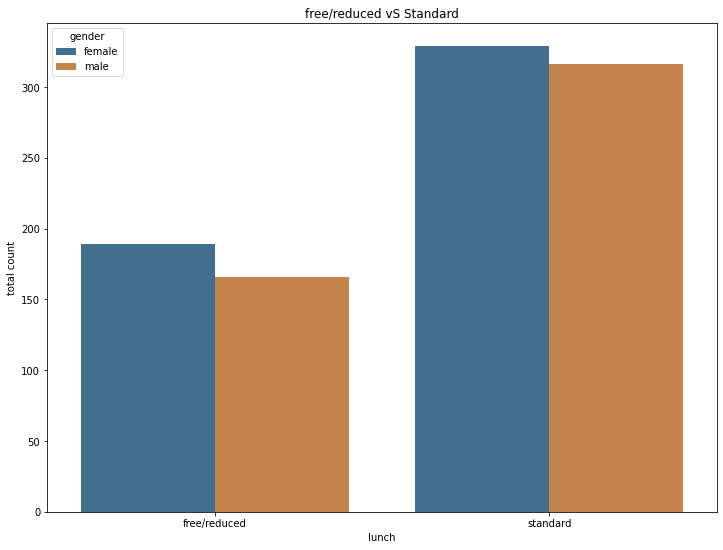

In [167]:
#Display the visulzation 
plt.figure(figsize=(12,9))
sns.barplot(y='total count',x='lunch',data=students,hue='gender',errwidth=0.2,saturation=0.5)
plt.title("free/reduced vS Standard")
plt.show()

In [168]:
prep=data['preparation'].value_counts().index

In [169]:
pre=data['preparation'].value_counts().values
pre

array([642, 358])

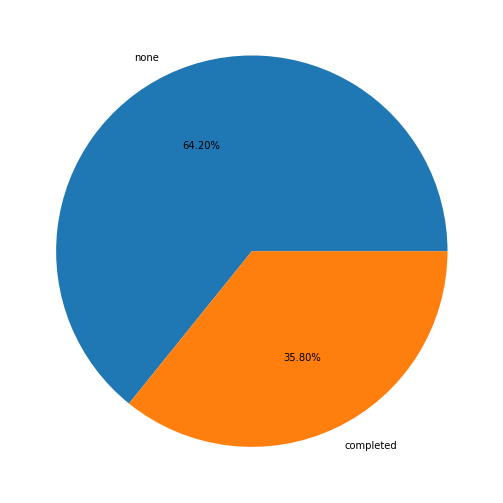

In [170]:
plt.figure(figsize=(16,9))
plt.pie(pre,labels=prep,autopct="%1.2f%%")
plt.show()

**bold text**